## 2.1: Structure and Architecture of a Neural Network

A multi-layer neural network includes three types of layers:
- **Input Layer**: Receives the input data.
- **Hidden Layer**: Processes and transforms the information from the input. There can be one or more hidden layers in a deep network.
- **Output Layer**: Generates the final result (e.g., a prediction).

Each neuron in a layer connects with all the neurons in the next layer, forming a fully connected network. This structure allows each layer to learn and refine the features detected in the previous layer.

For a network with two layers (one hidden layer and one output layer), we will use an activation function in each layer to introduce non-linearity.

## 2.2: Activation Functions

Activation functions introduce non-linearity into the network, allowing the model to learn complex patterns. Without activation functions, neural networks could only learn linear relationships, which would limit their applicability.

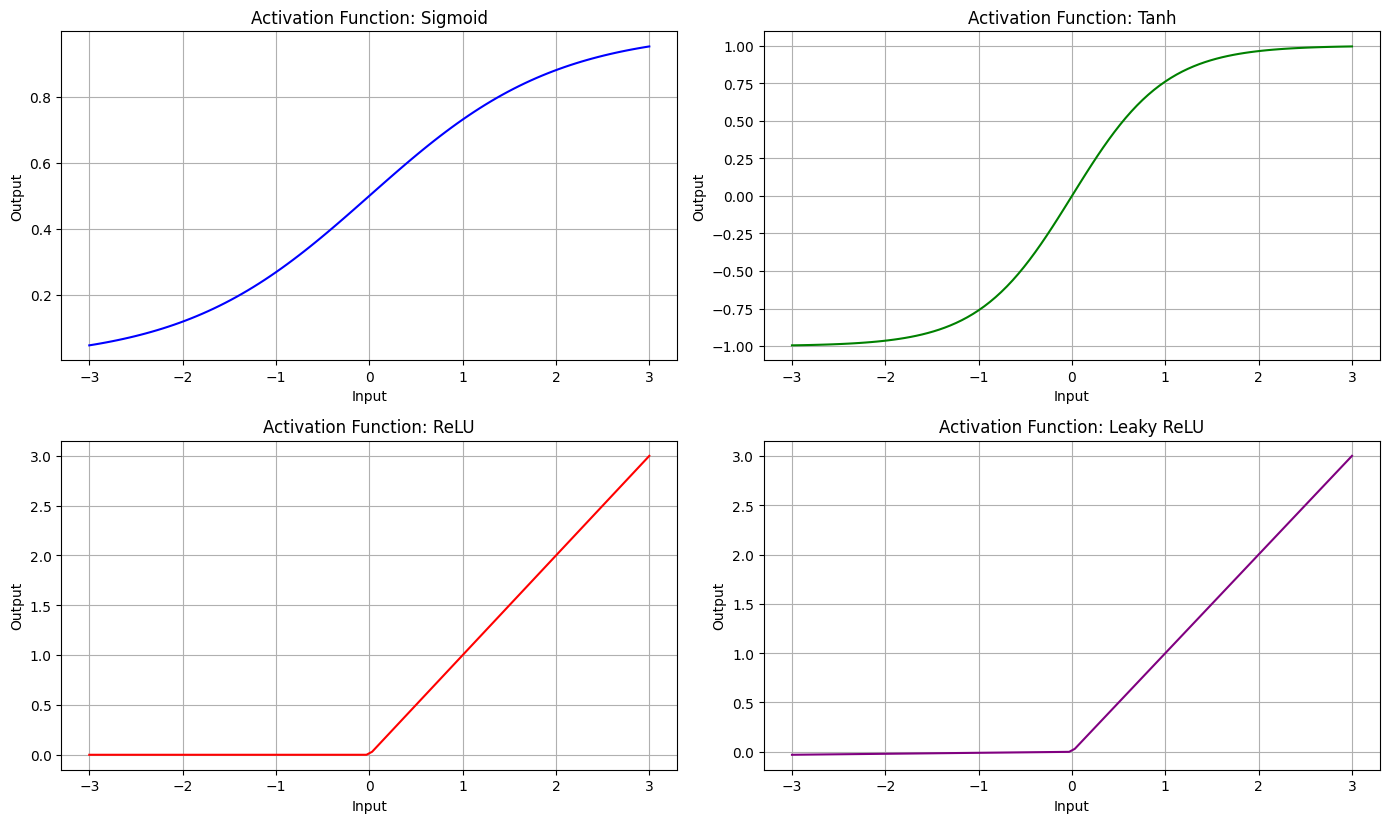

In [3]:
# Re-importing necessary libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt

# Definition of activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Input values
x_values = np.linspace(-3, 3, 100)

# Calculate outputs for each activation function
sigmoid_values = sigmoid(x_values)
tanh_values = tanh(x_values)
relu_values = relu(x_values)
leaky_relu_values = leaky_relu(x_values)

# Plot each function
plt.figure(figsize=(14, 12))

# Sigmoid
plt.subplot(3, 2, 1)
plt.plot(x_values, sigmoid_values, label="Sigmoid", color="blue")
plt.title("Activation Function: Sigmoid")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# Tanh
plt.subplot(3, 2, 2)
plt.plot(x_values, tanh_values, label="Tanh", color="green")
plt.title("Activation Function: Tanh")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# ReLU
plt.subplot(3, 2, 3)
plt.plot(x_values, relu_values, label="ReLU", color="red")
plt.title("Activation Function: ReLU")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# Leaky ReLU
plt.subplot(3, 2, 4)
plt.plot(x_values, leaky_relu_values, label="Leaky ReLU", color="purple")
plt.title("Activation Function: Leaky ReLU")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.2.1: Sigmoid Function

The sigmoid function converts the output of a neuron to a value between 0 and 1, making it useful for **binary classification** problems (such as distinguishing between two classes).

#### Equation
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

- **Range:** (0, 1)

- **Curve Shape:** The sigmoid has an "S" shape, with output values close to 0 when $x$ is negative, and close to 1 when $x$ is positive.

#### Advantages
- It is suitable for binary classification problems, as the values are in the probability range (0 to 1).

#### Disadvantages
- **Vanishing gradient:** When the input values are large or small, the derivative of the sigmoid becomes almost zero, making it difficult for the network to adjust its weights in those regions (especially in deep networks).

- **Output not centered at zero:** The output is always positive, which can make learning less efficient.

#### Derivative
The derivative of the sigmoid is used in weight adjustment. The derivative of $f(x)$ is:
$$
f'(x) = f(x) \times (1 - f(x))
$$

Resolution for specific values:

- For $x = -2$:
  $$
  f(-2) = \frac{1}{1 + e^2} \approx \frac{1}{1 + 7.389} \approx \frac{1}{8.389} \approx 0.119
  $$

- For $x = 0$:
  $$
  f(0) = \frac{1}{1 + e^0} = \frac{1}{1 + 1} = \frac{1}{2} = 0.5
  $$

- For $x = 2$:
  $$
  f(2) = \frac{1}{1 + e^{-2}} \approx \frac{1}{1 + 0.135} \approx \frac{1}{1.135} \approx 0.881
  $$

### 2.2.2: Tanh Function (Hyperbolic Tangent)### 2.2.2: Función Tanh (Tangente Hiperbólica)

The tanh function is a sigmoid function that is **centered at zero**. It converts the output values of a neuron to a range between -1 and 1, which can make learning more efficient compared to the sigmoid.

#### Equation
$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- **Range:** (-1, 1)

- **Curve Shape:** The tanh function also has an "S" shape, but its range allows negative values, which can improve learning in some networks.

#### Advantages
- **Centered at zero:** Having both negative and positive values helps the gradients and activations of the network to be centered around zero, making weight adjustments more stable and efficient.

#### Disadvantages
- **Vanishing gradient:** Although less severe than with the sigmoid function, tanh also suffers from the vanishing gradient problem for extreme input values.

#### Derivative
The derivative of tanh is calculated as:
$$
f'(x) = 1 - f(x)^2
$$

Resolution for specific values:

- For $x = -2$:
  $$
  f(-2) = \frac{e^{-2} - e^2}{e^2 + e^{-2}} = \frac{0.135 - 7.389}{7.389 + 0.135} \approx \frac{-7.254}{7.524} \approx -0.964
  $$

- For $x = 0$:
  $$
  f(0) = \frac{e^0 - e^0}{e^0 + e^0} = \frac{1 - 1}{1 + 1} = 0
  $$

- For $x = 2$:
  $$
  f(2) = \frac{e^2 - e^{-2}}{e^2 + e^{-2}} = \frac{7.389 - 0.135}{7.389 + 0.135} \approx \frac{7.254}{7.524} \approx 0.964
  $$

### 2.2.3 Funcion ReLu (Rectified Linear Unit)

The ReLU (Rectified Linear Unit) function is currently one of the most widely used activation functions, especially in deep networks, due to its simplicity and efficiency.

#### Equation
$$
f(x) = \max(0, x)
$$

- **Range:** $[0, \infty)$

- **Curve Shape:** ReLU is linear for positive values of $x$ and zero for negative values.

#### Advantages
- **Computational efficiency:** ReLU is fast to compute and has a simple derivative.
- **Less vanishing gradient problem:** The derivative of ReLU is constant (1 for $x > 0$), which avoids the problem of very small gradients.

#### Disadvantages
- **Dead neurons:** For negative values of $x$, the output is always zero and the gradient is also zero, which can lead to certain neurons stopping learning (this is called the "dead neurons" problem).

#### Derivative
The derivative of ReLU is:
$$
f'(x) = 
\begin{cases} 
1 & \text{if } x > 0 \\ 
0 & \text{if } x \leq 0 
\end{cases}
$$

Resolution for specific values:

- For $x = -2$:
  $$
  f(-2) = \max(0, -2) = 0
  $$

- For $x = 0$:
  $$
  f(0) = \max(0, 0) = 0
  $$

- For $x = 2$:
  $$
  f(2) = \max(0, 2) = 2
  $$

### 2.2.4 Leaky ReLU Function (ReLU with Slope)

To solve the "dead neurons" problem of ReLU, **Leaky ReLU** was introduced, which allows negative values with a small slope instead of zero.

#### Equation
$$
f(x) = 
\begin{cases} 
x & \text{if } x > 0 \\ 
\alpha x & \text{if } x \leq 0 
\end{cases}
$$

where $\alpha$ is a small positive value, commonly 0.01.

- **Range:** $(-\infty, \infty)$
- **Curve Shape:** Similar to ReLU, but with a small slope for negative values of $x$.

#### Advantages
- **Avoids dead neurons:** The slope on the negative side allows the neuron to continue learning even for negative values.

#### Derivative
The derivative of Leaky ReLU is:
$$
f'(x) = 
\begin{cases} 
1 & \text{if } x > 0 \\ 
\alpha & \text{if } x \leq 0 
\end{cases}
$$

Resolution for specific values (we will use $\alpha = 0.01$):

- For $x = -2$:
  $$
  f(-2) = 0.01 \cdot (-2) = -0.02
  $$

- For $x = 0$:
  $$
  f(0) = 0.01 \cdot 0 = 0
  $$

- For $x = 2$:
  $$
  f(2) = 2 \quad (\text{since } x > 0)
  $$

### 2.2.5: Softmax Function

Softmax transforms a set of values into a probability distribution. Given a series of inputs, it calculates the exponential of each input, then normalizes these values so that they sum to 1. Thus, the highest value in the input becomes the highest probability in the output.

#### Softmax Formula
Given a vector of input values $(z_1, z_2, \dots, z_n)$, the Softmax function converts these values into probabilities as follows:
$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$

Where:
- $e^{z_i}$ is the exponential of the value $z_i$,
- $\sum_{j=1}^n e^{z_j}$ is the sum of all the exponentials of the values in the vector.

#### Softmax Calculation Example
Suppose we have three input values, $[z_1, z_2, z_3] = [2.0, 1.0, 0.1]$. Let's apply the Softmax function to see how they are converted into probabilities.

1. **Calculate the exponentials:**
   - $e^{z_1} = e^{2.0} \approx 7.389$
   - $e^{z_2} = e^{1.0} \approx 2.718$
   - $e^{z_3} = e^{0.1} \approx 1.105$

2. **Calculate the sum of the exponentials:**
   $$
   \sum_{j=1}^3 e^{z_j} = 7.389 + 2.718 + 1.105 = 11.212
   $$

3. **Divide each exponential by the total sum:**
   $$
   \text{Softmax}(z_1) = \frac{7.389}{11.212} \approx 0.659
   $$
   $$
   \text{Softmax}(z_2) = \frac{2.718}{11.212} \approx 0.242
   $$
   $$
   \text{Softmax}(z_3) = \frac{1.105}{11.212} \approx 0.099
   $$

**Result:** The final values are transformed into probabilities $[0.659, 0.242, 0.099]$, where the first class (corresponding to $z_1$) has the highest probability of being the correct class.

## 2.3: Neural Network Implementation

We will create a two-layer neural network, with a hidden layer using the ReLU function and an output layer using the sigmoid function. This allows the hidden layer to capture complex relationships, and the output layer to generate an output between 0 and 1.

In [35]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

input_data = [2.0, 3.0]

weights_hidden = [[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]]
bias_hidden = [0.1, -0.1, 0.05]

output_hidden = []
for i in range(3):  # 3 neurons in the hidden layer
    z = input_data[0] * weights_hidden[i][0] + input_data[1] * weights_hidden[i][1] + bias_hidden[i]
    output_hidden.append(relu(z))  # ReLU activation

weights_output = [[0.7, 0.8, 0.9], [-0.1, -0.2, -0.3]]
bias_output = [0.1, -0.1]

output_final = []
for j in range(2):  # 2 neurons in the output layer
    z = sum(output_hidden[i] * weights_output[j][i] for i in range(3)) + bias_output[j]
    output_final.append(sigmoid(z))  # Sigmoid activation

print("Network output:", output_final)

Salida de la red: [0.9905757482713531, 0.20020717819927927]


### 2.3.1: Implement a Class and Forward Method

In [34]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(z):
    exp_values = np.exp(z - np.max(z))  
    sum_exp_values = np.sum(exp_values)
    probabilities = exp_values / sum_exp_values
    return probabilities

class NeuralNetworkWithSoftmax:
    def __init__(self):
        self.weights_hidden = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]]) 
        self.bias_hidden = np.array([0.1, -0.1, 0.05])                      
        self.weights_output = np.array([[0.7, 0.8, 0.9], [-0.1, -0.2, -0.3], [0.3, 0.2, 0.1]])
        self.bias_output = np.array([0.1, -0.1, 0.05])                       

    def forward(self, input_data):
        # Forward pass in the hidden layer
        hidden_layer_input = np.dot(self.weights_hidden, input_data) + self.bias_hidden
        hidden_layer_output = relu(hidden_layer_input)  # Apply ReLU function in the hidden layer
        
        # Forward pass in the output layer
        output_layer_input = np.dot(self.weights_output, hidden_layer_output) + self.bias_output
        output = softmax(output_layer_input)  # Apply Softmax function in the output layer to get probabilities
        
        return output

network = NeuralNetworkWithSoftmax()

input_data = np.array([2.0, 3.0])

output = network.forward(input_data)

print("Output probabilities (Softmax):", output)

Probabilidades de salida (Softmax): [0.97384346 0.00231927 0.02383728]


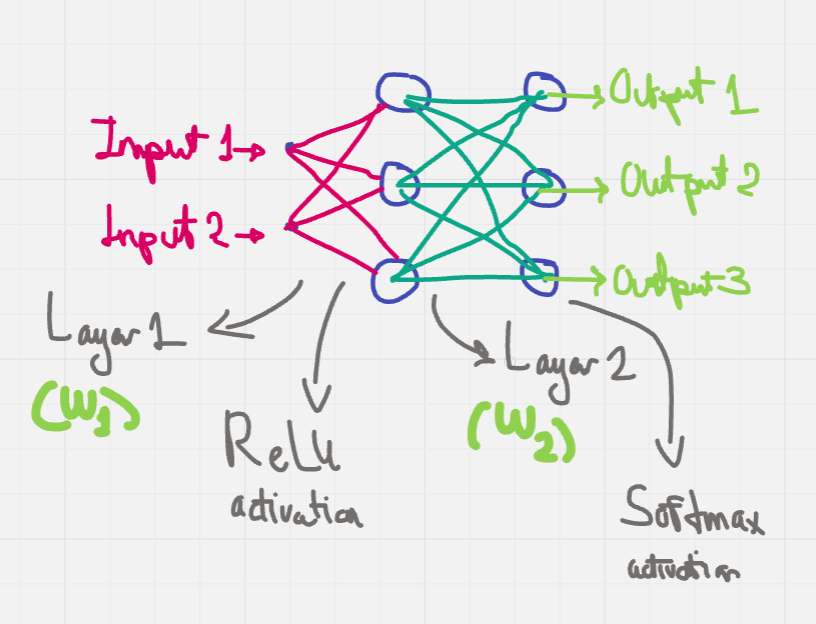

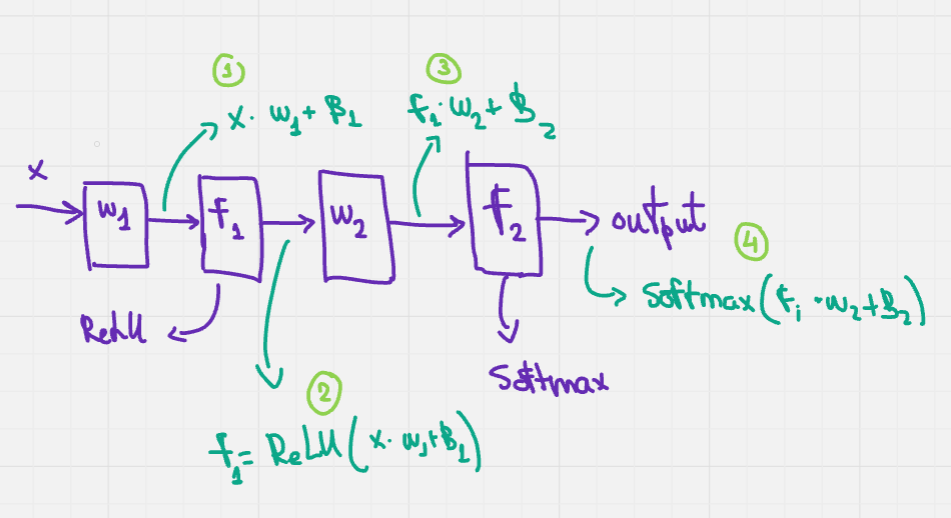